In [1]:
#import libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/diabetes_dataset.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
from sklearn.model_selection import train_test_split
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13, stratify=y)


In [32]:
# Build NN model
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential([
   Dense(4, activation='relu', input_dim=8),
   #Dense(4, activation='relu'),
   Dense(1, activation='sigmoid'),
 ]);

classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 36        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile model
from tensorflow.keras.optimizers import Adam
classifier.compile(optimizer = Adam(learning_rate=0.008), loss = 'binary_crossentropy', metrics=['accuracy'])

In [34]:
history=classifier.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 32, epochs = 200, verbose=2)

Epoch 1/200
17/17 - 1s - loss: 8.0266 - accuracy: 0.6518 - val_loss: 1.9207 - val_accuracy: 0.6277 - 752ms/epoch - 44ms/step
Epoch 2/200
17/17 - 0s - loss: 1.6465 - accuracy: 0.5605 - val_loss: 1.1747 - val_accuracy: 0.6364 - 58ms/epoch - 3ms/step
Epoch 3/200
17/17 - 0s - loss: 0.8533 - accuracy: 0.5810 - val_loss: 0.7675 - val_accuracy: 0.5628 - 55ms/epoch - 3ms/step
Epoch 4/200
17/17 - 0s - loss: 0.6959 - accuracy: 0.6443 - val_loss: 0.7134 - val_accuracy: 0.6277 - 63ms/epoch - 4ms/step
Epoch 5/200
17/17 - 0s - loss: 0.6754 - accuracy: 0.6443 - val_loss: 0.7069 - val_accuracy: 0.6190 - 61ms/epoch - 4ms/step
Epoch 6/200
17/17 - 0s - loss: 0.6782 - accuracy: 0.6406 - val_loss: 0.7738 - val_accuracy: 0.6190 - 63ms/epoch - 4ms/step
Epoch 7/200
17/17 - 0s - loss: 0.6844 - accuracy: 0.6499 - val_loss: 0.6973 - val_accuracy: 0.6234 - 61ms/epoch - 4ms/step
Epoch 8/200
17/17 - 0s - loss: 0.6432 - accuracy: 0.6592 - val_loss: 0.7439 - val_accuracy: 0.5584 - 72ms/epoch - 4ms/step
Epoch 9/200
17

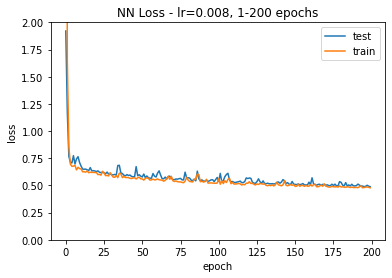

In [38]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('NN Loss - lr=0.008, 1-200 epochs')
plt.ylabel('loss')
plt.ylim([0, 2])
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()

In [39]:
# Compile model
from tensorflow.keras.optimizers import Adam
classifier.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [40]:
history=classifier.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 32, epochs = 200, verbose=2)

Epoch 1/200
17/17 - 1s - loss: 0.4760 - accuracy: 0.7635 - val_loss: 0.4898 - val_accuracy: 0.7879 - 637ms/epoch - 37ms/step
Epoch 2/200
17/17 - 0s - loss: 0.4721 - accuracy: 0.7747 - val_loss: 0.4871 - val_accuracy: 0.7662 - 64ms/epoch - 4ms/step
Epoch 3/200
17/17 - 0s - loss: 0.4714 - accuracy: 0.7765 - val_loss: 0.4873 - val_accuracy: 0.7662 - 65ms/epoch - 4ms/step
Epoch 4/200
17/17 - 0s - loss: 0.4721 - accuracy: 0.7765 - val_loss: 0.4880 - val_accuracy: 0.7792 - 55ms/epoch - 3ms/step
Epoch 5/200
17/17 - 0s - loss: 0.4702 - accuracy: 0.7821 - val_loss: 0.4872 - val_accuracy: 0.7619 - 55ms/epoch - 3ms/step
Epoch 6/200
17/17 - 0s - loss: 0.4719 - accuracy: 0.7821 - val_loss: 0.4894 - val_accuracy: 0.7792 - 58ms/epoch - 3ms/step
Epoch 7/200
17/17 - 0s - loss: 0.4703 - accuracy: 0.7821 - val_loss: 0.4867 - val_accuracy: 0.7662 - 64ms/epoch - 4ms/step
Epoch 8/200
17/17 - 0s - loss: 0.4702 - accuracy: 0.7784 - val_loss: 0.4876 - val_accuracy: 0.7792 - 53ms/epoch - 3ms/step
Epoch 9/200
17

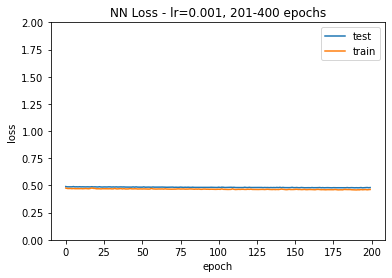

In [41]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('NN Loss - lr=0.001, 201-400 epochs')
plt.ylabel('loss')
plt.ylim([0, 2])
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()

In [42]:
# Get confusion matrix for randoly slected test sets

# 
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split data into train/test sets with randomization
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)


y_pred = classifier.predict(x_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]
y_test = np.array(y_test)
total = 0
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y_pred)):
  total=total+1
  if (y_test[i] == 1 and y_pred[i] == 1): tn=tn+1
  elif (y_test[i] == 0 and y_pred[i] == 0): tp=tp+1
  elif (y_test[i] == 0 and y_pred[i] == 1): fn=fn+1
  elif (y_test[i] == 1 and y_pred[i] == 0): fp=fp+1
  else: print("E")

print("Total " + str(total))
print("TP: ",tp/total)
print("TN: ",tn/total)
print("FP: ",fp/total)
print("FN: ",fn/total)


Total 154
TP:  0.564935064935065
TN:  0.22077922077922077
FP:  0.14935064935064934
FN:  0.06493506493506493
